In [117]:
import pandas as pd
import numpy as np

In [120]:
data = pd.read_csv('test_1000.csv')

In [121]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [122]:
data = data.drop(['id','qid1','qid2'], axis=1)

In [123]:
#length based features
data['len_q1'] = data.question1.apply(lambda x: len(str(x)))
data['len_q2'] = data.question2.apply(lambda x: len(str(x)))
# difference in lengths of two questions
data['diff_len'] = data.len_q1 - data.len_q2

# character length based features
data['len_char_q1'] = data.question1.apply(lambda x: 
len(''.join(set(str(x).replace(' ', '')))))
data['len_char_q2'] = data.question2.apply(lambda x: 
len(''.join(set(str(x).replace(' ', '')))))

# word length based features
data['len_word_q1'] = data.question1.apply(lambda x: 
len(str(x).split()))
data['len_word_q2'] = data.question2.apply(lambda x: 
len(str(x).split()))

# common words in the two questions
data['common_words'] = data.apply(lambda x: 
len(set(str(x['question1'])
.lower().split())
.intersection(set(str(x['question2'])
.lower().split()))), axis=1)

In [124]:
data.head()

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,20,20,14,12,10
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,-37,21,29,8,13,4
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,25,24,14,10,4
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,-15,19,26,11,9,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,37,25,18,13,7,2


In [155]:
fs_1 = data[['len_q1', 'len_q2', 'diff_len', 'len_char_q1', 
        'len_char_q2', 'len_word_q1', 'len_word_q2',     
        'common_words']]

In [126]:
fs_1 = data[[ 'diff_len', 'common_words']]

In [156]:
fs_1.head()

,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words
0,66,57,9,20,20,14,12,10
1,51,88,-37,21,29,8,13,4
2,73,59,14,25,24,14,10,4
3,50,65,-15,19,26,11,9,0
4,76,39,37,25,18,13,7,2


In [128]:
pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.


In [129]:
#pip install python-Levenshtein


In [130]:
from fuzzywuzzy import fuzz


In [131]:
fuzz.partial_ratio("How can I start an online shopping (e-commerce) website?", "Which web technology is best suitable for building a big E-Commerce website?")

57

In [132]:
fuzz.partial_ratio("what is your name", "what is  his name")

76

In [133]:
data['fuzz_qratio'] = data.apply(lambda x: fuzz.QRatio(
    str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_WRatio'] = data.apply(lambda x: fuzz.WRatio(
str(x['question1']), str(x['question2'])), axis=1)

data['fuzz_partial_ratio'] = data.apply(lambda x: 
fuzz.partial_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

data['fuzz_partial_token_set_ratio'] = data.apply(lambda x:
fuzz.partial_token_set_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

data['fuzz_partial_token_sort_ratio'] = data.apply(lambda x: 
fuzz.partial_token_sort_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

data['fuzz_token_set_ratio'] = data.apply(lambda x: 
fuzz.token_set_ratio(str(x['question1']), 
str(x['question2'])), axis=1)

In [134]:
data['fuzz_token_sort_ratio'] = data.apply(lambda x: 
                   fuzz.token_sort_ratio(str(x['question1']), 
                   str(x['question2'])), axis=1)

In [135]:
data.head()

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,20,20,14,12,10,93,95,98,100,89,100,93
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,-37,21,29,8,13,4,66,86,73,100,75,86,63
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,25,24,14,10,4,54,63,53,100,71,66,66
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,-15,19,26,11,9,0,35,35,30,37,38,36,36
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,37,25,18,13,7,2,46,86,54,100,63,67,47


In [157]:
fs_2 = data[['fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio', 
       'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio',
       'fuzz_token_set_ratio', 'fuzz_token_sort_ratio']]

In [137]:
fs_2 = data[['fuzz_WRatio', 'fuzz_partial_ratio','fuzz_token_set_ratio', 'fuzz_token_sort_ratio']]

In [138]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [158]:
fs_2.head()

,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
0,93,95,98,100,89,100,93
1,66,86,73,100,75,86,63
2,54,63,53,100,71,66,66
3,35,35,30,37,38,36,36
4,46,86,54,100,63,67,47


from sklearn.feature_extraction.text import TfidfVectorizer
from copy import deepcopy
tfv_q1 = TfidfVectorizer(min_df=3, 
max_features=None, 
strip_accents='unicode', 
analyzer='word', 
token_pattern=r'w{1,}',
ngram_range=(1, 2), 
use_idf=1, 
smooth_idf=1, 
sublinear_tf=1,
stop_words='english')

tfv_q2 = deepcopy(tfv_q1)

q1_tfidf = tfv_q1.fit_transform(data.question1.fillna(""))
q2_tfidf = tfv_q2.fit_transform(data.question2.fillna(""))

from sklearn.decomposition import TruncatedSVD
svd_q1 = TruncatedSVD(n_components=1)
svd_q2 = TruncatedSVD(n_components=1)

question1_vectors = svd_q1.fit_transform(q1_tfidf)
question2_vectors = svd_q2.fit_transform(q2_tfidf)

from scipy import sparse
# obtain features by stacking the sparse matrices together
fs3_1 = sparse.hstack((q1_tfidf, q2_tfidf))

tfv = TfidfVectorizer(min_df=3, 
                      max_features=None, 
                      strip_accents='unicode', 
                      analyzer='word', 
                      token_pattern=r'w{1,}',
                      ngram_range=(1, 2), 
                      use_idf=1, 
                      smooth_idf=1, 
                      sublinear_tf=1,
                      stop_words='english')

# combine questions and calculate tf-idf
q1q2 = data.question1.fillna("") 
q1q2 += " " + data.question2.fillna("")
fs3_2 = tfv.fit_transform(q1q2)

# obtain features by stacking the matrices together
fs3_3 = np.hstack((question1_vectors, question2_vectors))

In [159]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()
data.head()

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,20,20,14,12,10,93,95,98,100,89,100,93
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,-37,21,29,8,13,4,66,86,73,100,75,86,63
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,25,24,14,10,4,54,63,53,100,71,66,66
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,-15,19,26,11,9,0,35,35,30,37,38,36,36
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,37,25,18,13,7,2,46,86,54,100,63,67,47


In [161]:
X = pd.concat([fs_1, fs_2], axis=1)
X=X.astype('float64')
Y=data["is_duplicate"]
X.head()

,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
0,66.0,57.0,9.0,20.0,20.0,14.0,12.0,10.0,93.0,95.0,98.0,100.0,89.0,100.0,93.0
1,51.0,88.0,-37.0,21.0,29.0,8.0,13.0,4.0,66.0,86.0,73.0,100.0,75.0,86.0,63.0
2,73.0,59.0,14.0,25.0,24.0,14.0,10.0,4.0,54.0,63.0,53.0,100.0,71.0,66.0,66.0
3,50.0,65.0,-15.0,19.0,26.0,11.0,9.0,0.0,35.0,35.0,30.0,37.0,38.0,36.0,36.0
4,76.0,39.0,37.0,25.0,18.0,13.0,7.0,2.0,46.0,86.0,54.0,100.0,63.0,67.0,47.0


In [162]:
#X.head()
X = scaler.fit_transform(X)

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=2)

In [164]:
X_test.shape

(500, 15)

In [165]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

In [166]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [167]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6699999999999999


In [168]:
BestLR=logreg_cv.best_estimator_
print("accuracy :",BestLR.score(X_test,Y_test))

accuracy : 0.666


In [179]:
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Duplicate', 'Duplicate']); ax.yaxis.set_ticklabels(['Not Duplicate', 'Duplicate'])

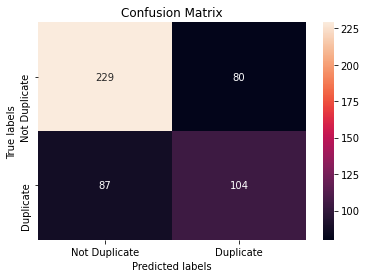

In [180]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [171]:
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [172]:
knn_cv=GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2}
accuracy : 0.688


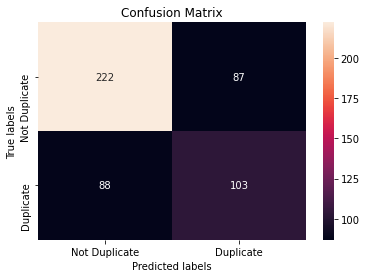

In [181]:
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [192]:
from sklearn import svm
svm_cv = svm.SVC(kernel='rbf')
#'poly','rbf', 'sigmoid'

In [193]:
svm_cv.fit(X_train,Y_train)
from sklearn import metrics
yhat = svm_cv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, yhat))

Accuracy: 0.704


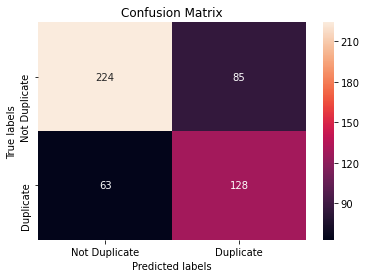

In [189]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [194]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [196]:
tree_cv=GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [197]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.704


In [198]:
BestTree=tree_cv.best_estimator_
print("accuracy :",BestTree.score(X_test,Y_test))

accuracy : 0.642


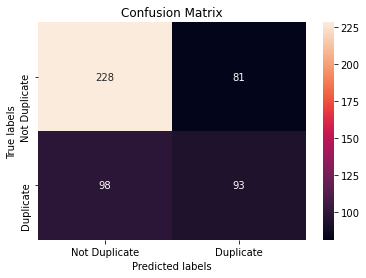

In [199]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)